<a href="https://colab.research.google.com/github/Xeron66/Quantum-Computing-Notes/blob/main/Lec_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibmq-provider

# Importing Libraries


In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

# Single Quantum Gate
Only a single qbit is needed to implement this gate

# X Gate / NOT Gate
x gate -> flips state |0> to |1> and vice versa
basically a NOT gate!

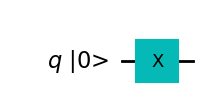

In [3]:
# create a circuit
circuit = QuantumCircuit(1)

# apply gate
circuit.x(0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)
# but how do we know that x gate flips the state?
# to know this we have to find out the state vector

In [4]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()
# we have to get the state vector from result

# get statevector
final_state = result.get_statevector()

Job Status: job has successfully run


<ipython-input-4-90c0da3c6957>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


In [5]:
print(final_state)
array_to_latex(final_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

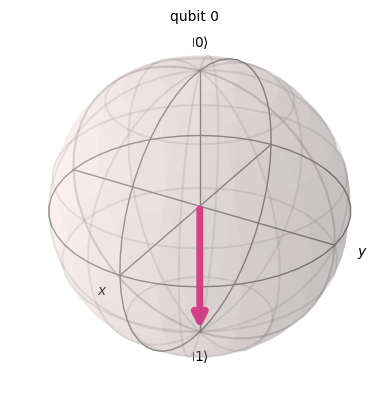

In [6]:
plot_bloch_multivector(final_state)

Now doing the same thing but with setting an initial state first.

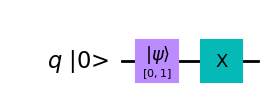

In [7]:
# create a circuit
circuit = QuantumCircuit(1)

# set initial state
initial_state = [0, 1] # it can also be set to [1, 0]

# initialize state
circuit.initialize(initial_state)

# apply gate
circuit.x(0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [8]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()
# we have to get the state vector from result

# get statevector
final_state = result.get_statevector()

<ipython-input-8-90c0da3c6957>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [9]:
print(final_state)
array_to_latex(final_state)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

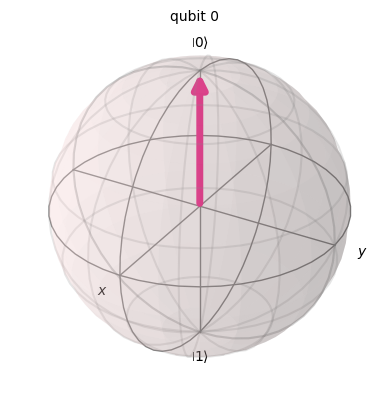

In [10]:
plot_bloch_multivector(final_state)
# so we can clearly see that the state changed to |1> from |0>

#Matrix Representation of X Gate
When using gates, we might not know the matrix representation of the gate. To actually get the matrix representation of the gate, we just simply multiply it with unitary matrix / vector

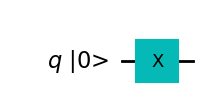

In [11]:
# create a circuit
circuit = QuantumCircuit(1)

# set initial state
# initial_state = [0, 1] # it can also be set to [1, 0]

# initialize state
# circuit.initialize(initial_state, 0)

# apply gate
circuit.x(0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)


In [12]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save unitary
circuit.save_unitary()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
unitary = result.get_unitary()

<ipython-input-12-e1bde380032a>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [13]:
print(unitary)
array_to_latex(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

# Matrix Representation of C NOT Gate

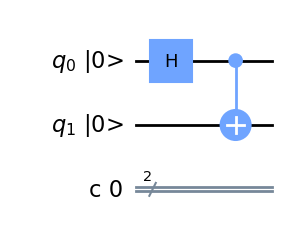

In [14]:
# create a circuit
circuit = QuantumCircuit(2, 2)

## Apply Gate
circuit.h(0)
# applying Hadamard gate gets the qbit into a superposition which can be used
# for fixed state

## Applying another gate here i.e., c not gate
# C not gate or cx gate is a multi qbit gate for that
# we need more than one qbit circuit
# its kinda like a not gate, the state of target qbit is
# changed to another state and stored into anothe qbit
circuit.cx(0, 1)
# here the argument of cx gate is, the first qbit is the control qbit
# and the second one is the target qbit
# in our case control qbit is 0 and target is 1

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [15]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save unitary
circuit.save_unitary()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
unitary = result.get_unitary()

<ipython-input-15-e1bde380032a>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [16]:
print(unitary)
array_to_latex(unitary)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>

# Matrix Representation of Hadamard Gate

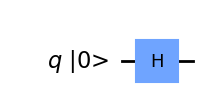

In [17]:
# create a circuit
circuit = QuantumCircuit(1)

## Apply Gate
circuit.h(0)
# applying Hadamard gate gets the qbit into a superposition which can be used
# for fixed state

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)

In [18]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save unitary
circuit.save_unitary()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
unitary = result.get_unitary()

<ipython-input-18-e1bde380032a>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [19]:
print(unitary)
array_to_latex(unitary)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

# Identity Gate

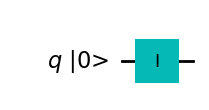

In [26]:
# create circuit
circuit = QuantumCircuit(1)

# apply gate
circuit.id(0)

# draw circuit
circuit.draw(output='mpl', initial_state = True)


To understand how a quantum gate affects a qbit, we need to findout the statevector.

In [27]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-27-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [28]:
print(final_state)
array_to_latex(final_state)


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

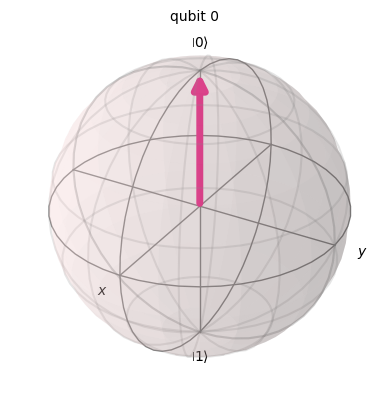

In [30]:
plot_bloch_multivector(final_state)

# 2 Qbit Gates

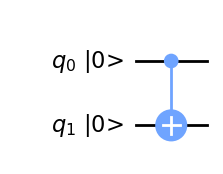

In [33]:
# create circuit
circuit = QuantumCircuit(2)

# apply gate
# circuit.cx(control_qbit, target_qbit)
circuit.cx(0, 1)

# draw circuit
circuit.draw(output='mpl', initial_state = True)

Basically, if control qbit (|0> in our case) is 1 then cx gate flips the target qbit (in our case |1>) to 0

In [34]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-34-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [35]:
print(final_state)
array_to_latex(final_state)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

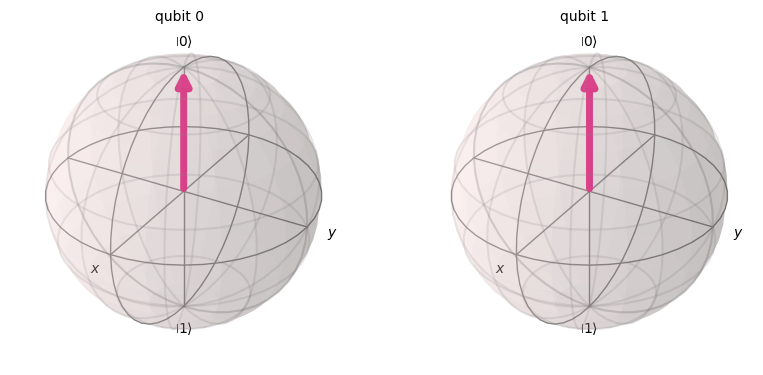

In [36]:
plot_bloch_multivector(final_state)

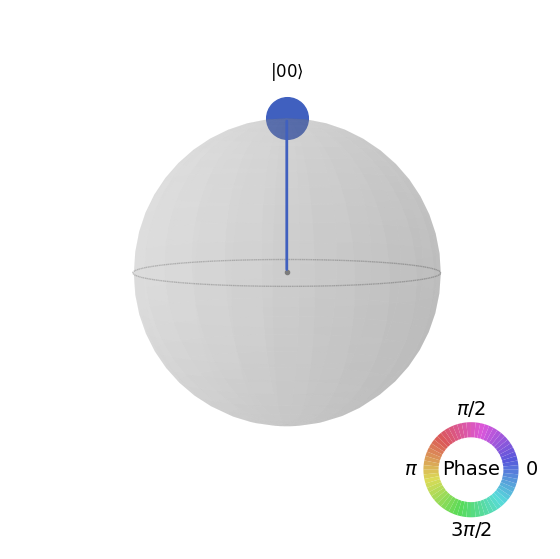

In [37]:
plot_state_qsphere(final_state)

Here, the bubble color is blue meaning the phase angle is 0

#Now lets see the same thing, but control as qbit 1 and target as qbit 0

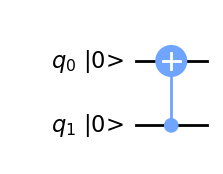

In [38]:
# create circuit
circuit = QuantumCircuit(2)

# apply gate
# circuit.cx(control_qbit, target_qbit)
circuit.cx(1, 0)
#changing the conrtol and target qbits

# draw circuit
circuit.draw(output='mpl', initial_state = True)

In [39]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-39-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [40]:
print(final_state)
array_to_latex(final_state)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

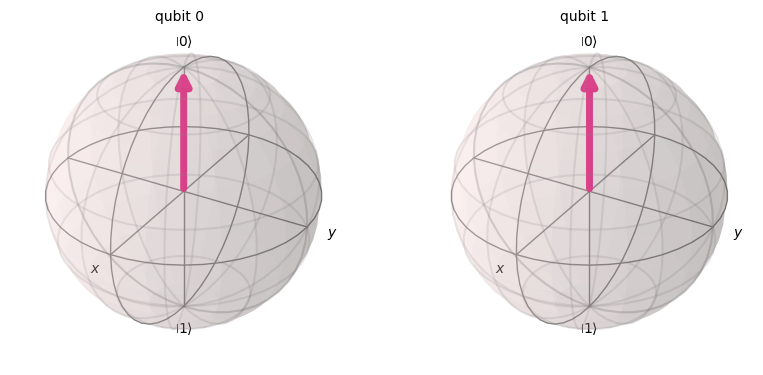

In [41]:
plot_bloch_multivector(final_state)

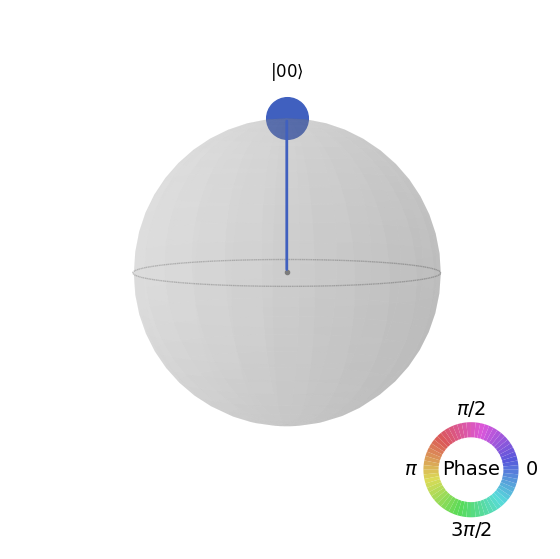

In [42]:
plot_state_qsphere(final_state)

#Swap Gate
swapping the state of one gate to another.
Its a two qbit gate!!

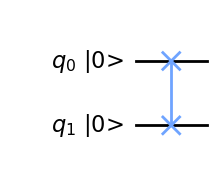

In [43]:
# create circuit
circuit = QuantumCircuit(2)

# apply gate
# circuit.swap(first_qbit, target_qbit)
circuit.swap(0, 1)
#changing the conrtol and target qbits

# draw circuit
circuit.draw(output='mpl', initial_state = True)

But here we cant understand visually whether the state actually changed or not because initially both qbits are in the same state, for that we have to apply a NOT gate to the first qbit to understand this better.

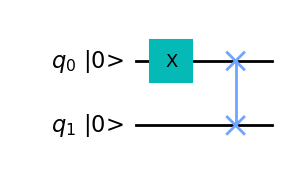

In [45]:
# create circuit
circuit = QuantumCircuit(2)

# apply X gate to 0th Qbit
circuit.x(0)

# apply gate
# circuit.swap(first_qbit, target_qbit)
circuit.swap(0, 1)
#changing the conrtol and target qbits

# draw circuit
circuit.draw(output='mpl', initial_state = True)

In [46]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-46-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [47]:
print(final_state)
array_to_latex(final_state)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

Using statevector we can see that the sate changed!

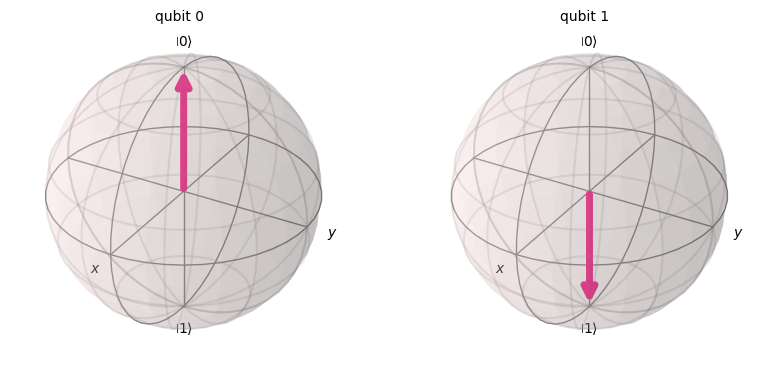

In [48]:
plot_bloch_multivector(final_state)

also by using bloch_multivector we can clearly see that state has been changed!

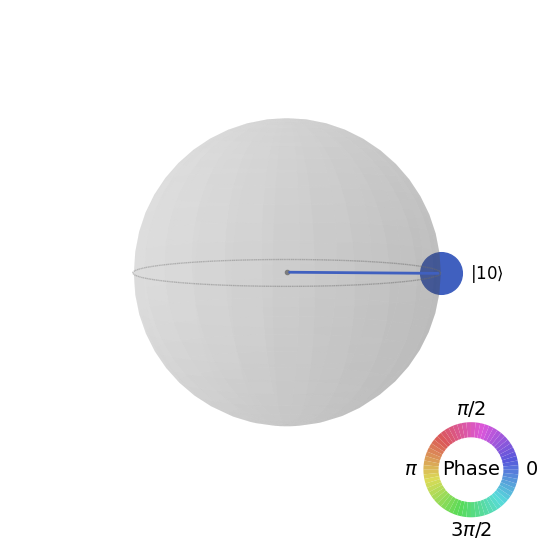

In [49]:
plot_state_qsphere(final_state)

# 3 Qbit Gate

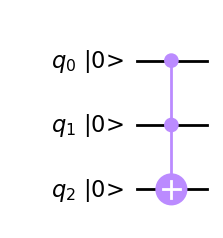

In [50]:
# create circuit
circuit = QuantumCircuit(3)

# apply gate
# CCX gate or Double Control NOT gate, also called Toffoli Gate
# takes 3 qbits0 (2 control and 1 target)
# applies NOT to the target only when both controls are in state 1
circuit.ccx(0, 1, 2)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)


In [51]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()


<ipython-input-51-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [52]:
print(final_state)
array_to_latex(final_state)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

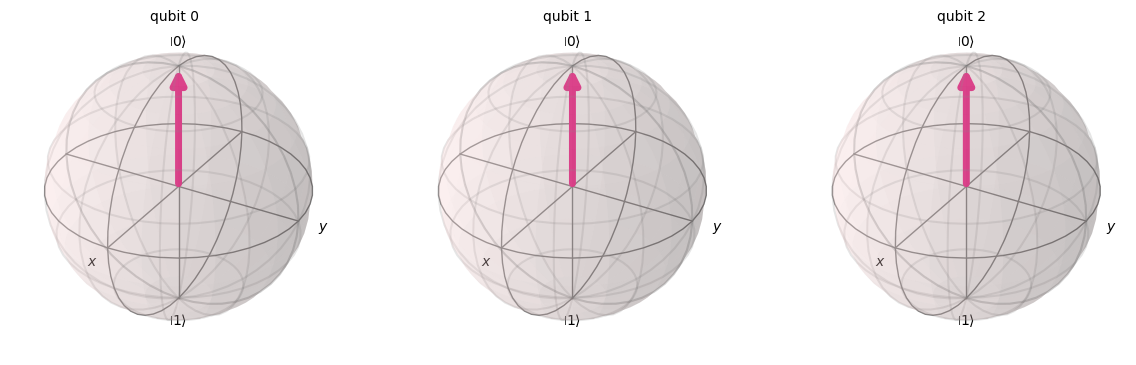

In [53]:
plot_bloch_multivector(final_state)

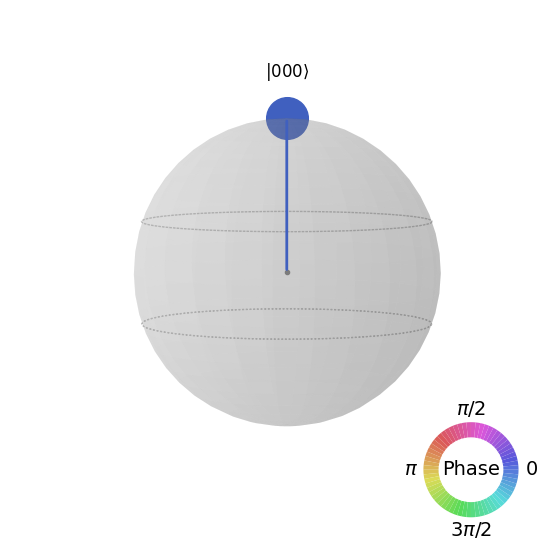

In [54]:
plot_state_qsphere(final_state)

# Now lets see if CCX gate actually changes the state according to its condition or not

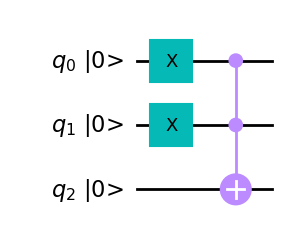

In [55]:
# create circuit
circuit = QuantumCircuit(3)

# apply x gate to 0th and 1th qbit
circuit.x(0)
circuit.x(1)

# apply gate
# CCX gate or Double Control NOT gate, also called Toffoli Gate
# takes 3 qbits0 (2 control and 1 target)
# applies NOT to the target only when both controls are in state 1
circuit.ccx(0, 1, 2)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)


In [56]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()


<ipython-input-56-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [57]:
print(final_state)
array_to_latex(final_state)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

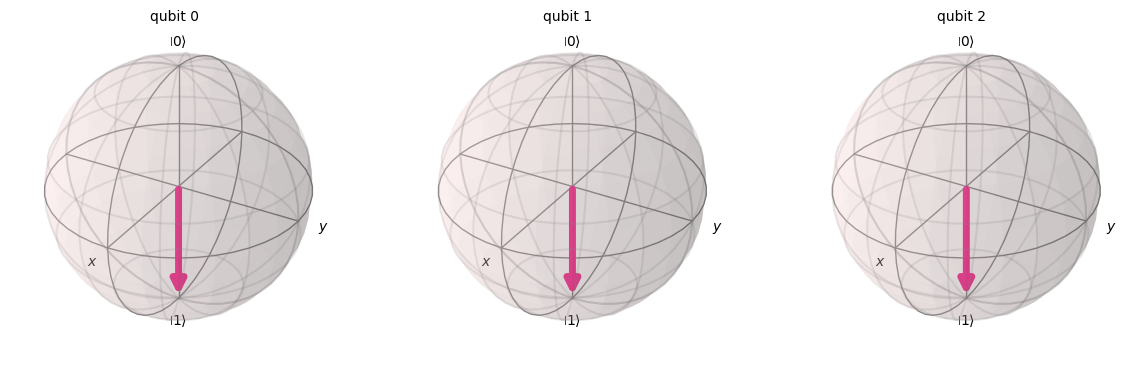

In [59]:
plot_bloch_multivector(final_state)

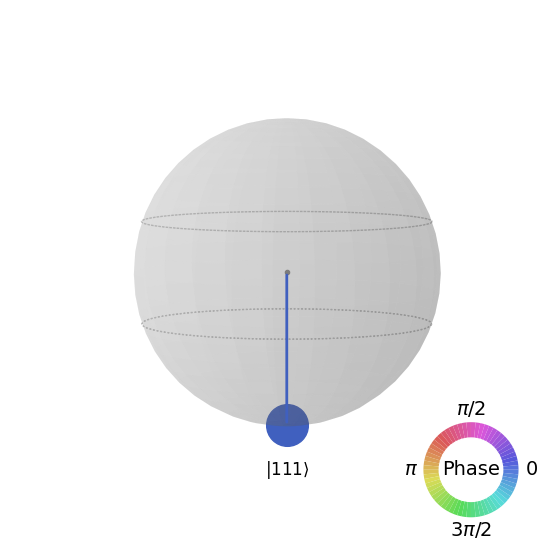

In [60]:
plot_state_qsphere(final_state)

# Phase Gate
phase gates ar single qbit gates, meaning you can only apply a phase gate to a single qbit.

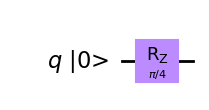

In [64]:
import numpy as np

# create circuit
circuit = QuantumCircuit(1)

# apply gate
# circuit.rz(angle, qbit)
circuit.rz(np.pi/4, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)

so rz gate basically rotates the qbit along the z-axis with an angle pi/4 or 90 degrees

In [65]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()


<ipython-input-65-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [66]:
print(final_state)
array_to_latex(final_state)

Statevector([0.92387953-0.38268343j, 0.        +0.j        ],
            dims=(2,))


<IPython.core.display.Latex object>

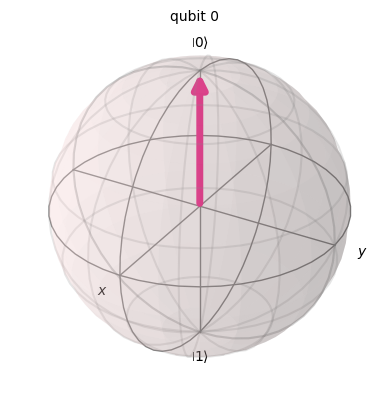

In [67]:
plot_bloch_multivector(final_state)

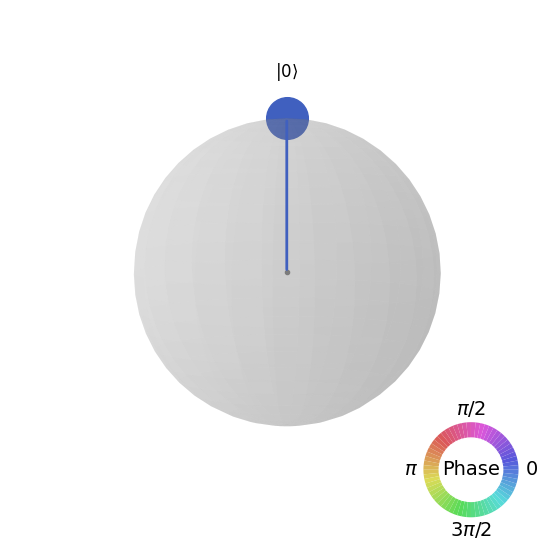

In [68]:
plot_state_qsphere(final_state)

It seems like, nothing changed much, so lets fix the initial state first then do this all over again.

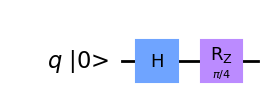

In [69]:
# create circuit
circuit = QuantumCircuit(1)

# apply h gate
circuit.h(0)

# apply gate
# circuit.rz(angle, qbit)
circuit.rz(np.pi/4, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)

In [70]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()


<ipython-input-70-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [71]:
print(final_state)
array_to_latex(final_state)

Statevector([0.65328148-0.27059805j, 0.65328148+0.27059805j],
            dims=(2,))


<IPython.core.display.Latex object>

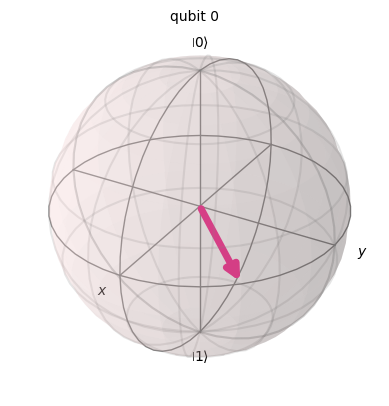

In [72]:
plot_bloch_multivector(final_state)

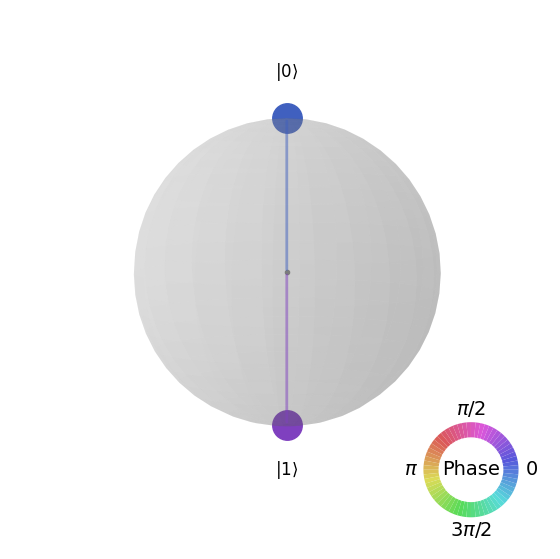

In [73]:
plot_state_qsphere(final_state)

now using pi / 6

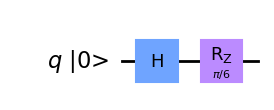

In [75]:
# create circuit
circuit = QuantumCircuit(1)

# apply h gate
circuit.h(0)

# apply gate
# circuit.rz(angle, qbit)
circuit.rz(np.pi/6, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)

In [76]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()


<ipython-input-76-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [77]:
print(final_state)
array_to_latex(final_state)

Statevector([0.6830127-0.1830127j, 0.6830127+0.1830127j],
            dims=(2,))


<IPython.core.display.Latex object>

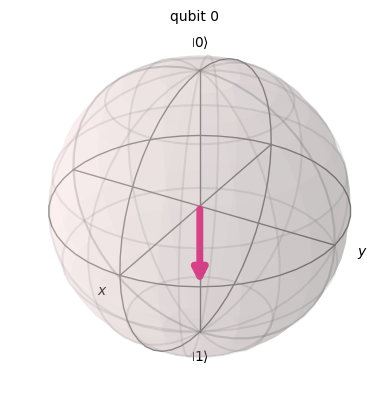

In [78]:
plot_bloch_multivector(final_state)

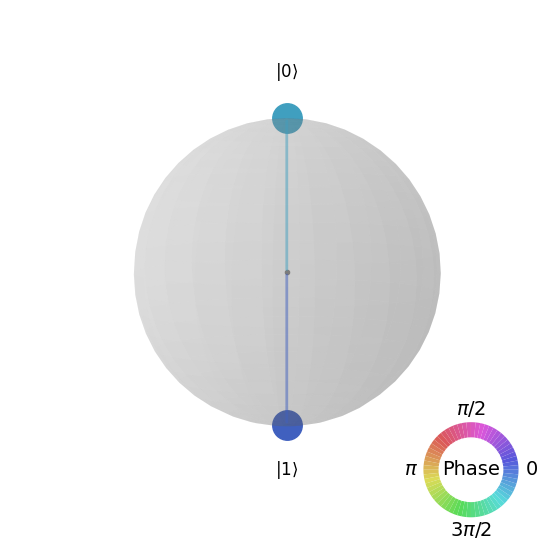

In [79]:
plot_state_qsphere(final_state)

# Quantum Gates

# SX gate
Square-root NOT Gate

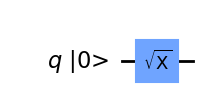

In [80]:
# create circuit
circuit = QuantumCircuit(1)

# apply h gate
circuit.sx(0)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)

In [81]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()


<ipython-input-81-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [82]:
print(final_state)
array_to_latex(final_state)

Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))


<IPython.core.display.Latex object>

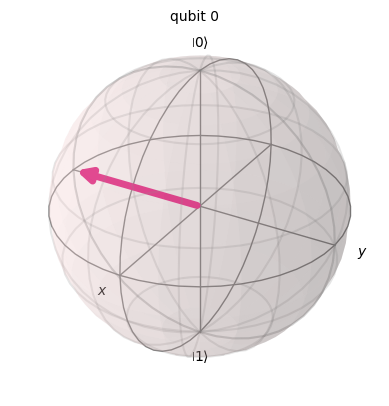

In [83]:
plot_bloch_multivector(final_state)

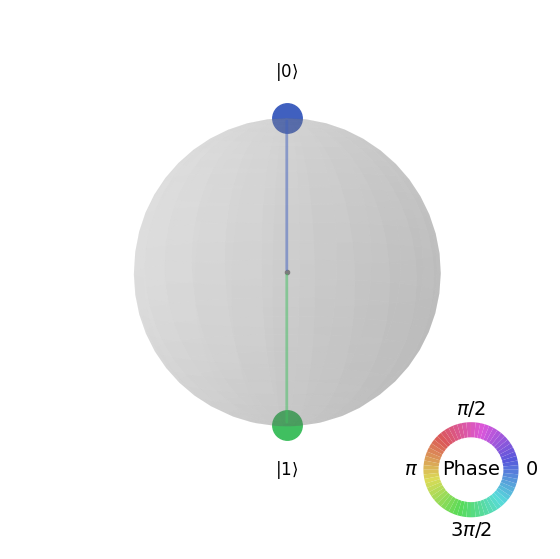

In [84]:
plot_state_qsphere(final_state)